In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import diffimTests as dit
import scipy.stats

reload(dit)

<module 'diffimTests' from 'diffimTests.pyc'>

In [2]:
#im1, im2, im1_psf, im2_psf = dit.makeFakeImages()
im1, im2, im1_psf, im2_psf = dit.makeFakeImages(psf_yvary_factor=0., theta2=-45., im2background=10.)
print scipy.stats.describe(im1, axis=None)
print scipy.stats.describe(im2, axis=None)
print scipy.stats.describe(im2 - im1, axis=None)

Template PSF: [1.6, 1.6] 0.0
Science PSF: [1.8, 2.2] -45.0
0.824621125124
Offset: [0.2, 0.2]
PSF y spatial-variation: -0.0 -0.0
Background: 10.0
DescribeResult(nobs=262144, minmax=(-0.92719462140093301, 2502.8378901515553), mean=28.094248089484477, variance=17324.677663930554, skewness=7.091002658067387, kurtosis=60.80385663636604)
DescribeResult(nobs=262144, minmax=(9.0909308706225023, 1695.0326409697866), mean=38.094266107681769, variance=11197.270129468929, skewness=5.701912812836189, kurtosis=39.403533400966865)
DescribeResult(nobs=262144, minmax=(-917.84081864175096, 256.96189294163315), mean=10.000018018197295, variance=1630.3348311544414, skewness=-6.794361885105783, kurtosis=76.20141719708221)


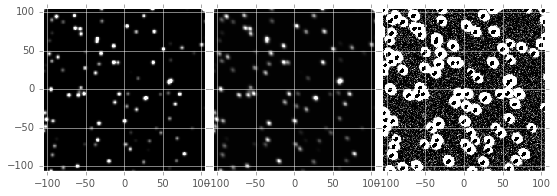

In [3]:
x0im, y0im = dit.getImageGrid(im1)
extent = (x0im.min()+150, x0im.max()-150, y0im.min()+150, y0im.max()-150)
x1d, x2d, y1d, y2d = 150, 512-150, 150, 512-150   # limits for display
dit.plotImageGrid((im1[x1d:x2d,y1d:y2d], im2[x1d:x2d,y1d:y2d], (im2-im1-10.)[x1d:x2d,y1d:y2d]*1000), extent=extent, imScale=3, clim=(-0.1, 1000))

0.207695102599 0.214749895547
DescribeResult(nobs=262144, minmax=(-0.92104999601877324, 5.9638298579706088), mean=1.5863416672921501e-13, variance=0.046135932862800155, skewness=0.6961546290038559, kurtosis=14.799340069791327)
DescribeResult(nobs=262144, minmax=(-1.2467840616027825, 6.7049317131178254), mean=-1.0523314504229606e-05, variance=0.083336035509602474, skewness=0.37796224409893064, kurtosis=6.789837395547634)


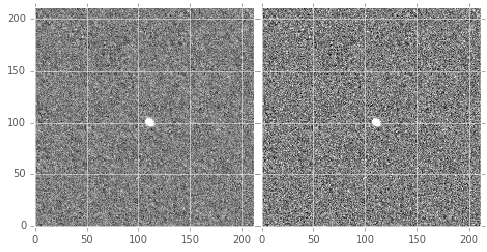

In [4]:
diffim1, kappa = dit.performAlardLupton(im1, im2, doALZCcorrection=False, verbose=False)
diffim2, kappa = dit.performAlardLupton(im1, im2, doALZCcorrection=True, verbose=False)
extent = (x0im.min()+150, x0im.max()-150, y0im.min()+150, y0im.max()-150)
x1d, x2d, y1d, y2d = 150, 512-150, 150, 512-150   # limits for display
dit.plotImageGrid((diffim1[x1d:x2d,y1d:y2d], diffim2[x1d:x2d,y1d:y2d]), imScale=4., clim=(-1,1))
print scipy.stats.describe(diffim1, axis=None)
print scipy.stats.describe(diffim2, axis=None)

-1.0015883711 1.00054204202
Original: -0.000522493111566 0.210134342833
Corrected:  -0.000580131612904 0.284259777876
Expected:  0.282842712475


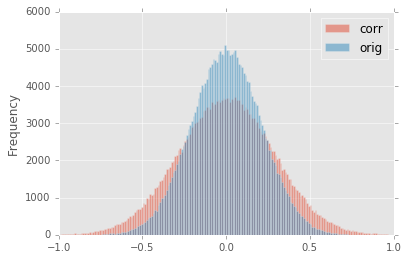

In [5]:
import pandas as pd
#df = pd.DataFrame({'corr': pci.flatten(), 'orig': (im2-conv_im1).flatten()})
#df.plot.hist(alpha=0.5, bins=200)

_, low, upp = scipy.stats.sigmaclip([diffim1, diffim2])
print low, upp
tmp1a = diffim1[(diffim1>low) & (diffim1<upp) & (diffim2>low) & (diffim2<upp)]
tmp2a = diffim2[(diffim1>low) & (diffim1<upp) & (diffim2>low) & (diffim2<upp)]
df = pd.DataFrame({'orig': tmp1a.flatten(), 'corr': tmp2a.flatten()})
df.plot.hist(alpha=0.5, bins=200)

print 'Original:', np.mean(tmp1a), np.std(tmp1a)
print 'Corrected: ', np.mean(tmp2a), np.std(tmp2a)
print 'Expected: ', np.sqrt(0.2**2 + 0.2**2)

(32, 32)


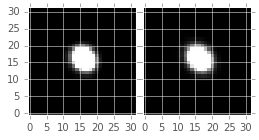

In [6]:
pcf = dit.computeCorrectedDiffimPsfALZC(kappa, im2_psf, sig1=0.2, sig2=0.2)
x = np.arange(-16, 16, 1)
y = x.copy()
im2_psf_small = im2_psf[(x0im.max()+x.min()+1):(x0im.max()-x.min()+1),
                        (y0im.max()+y.min()+1):(y0im.max()-y.min()+1)]
dit.plotImageGrid((pcf, im2_psf_small), clim=(0,0.01))

In [7]:
import cPickle
import gzip
#im1_psf = dit.gaussian2d(grid, m=[0, 0], s=[psf1, psf1])
#cPickle.dump((im1, im2, im1_psf, im2_psf, conv_im1, pci, pcf), gzip.GzipFile("14_results.p.gz", "wb"))
#cPickle.dump((im1, im2), gzip.GzipFile("qqq.p.gz", "wb"))

## Do ZOGY !

ZOGY can only handle images with no PSF variation off astrometric offset.

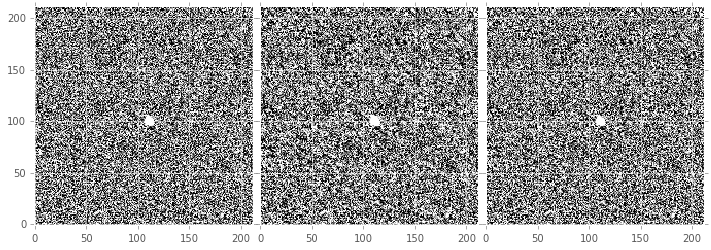

In [8]:
#im1_psf = dit.singleGaussian2d(x0im, y0im, 0, 0, 1.6, 1.6)
#im2_psf = dit.singleGaussian2d(x0im, y0im, 0, 0, 2.2, 2.2)
D = dit.performZOGY(im1, im2-10., im1_psf, im2_psf)
#plt.imshow(D, interpolation='none', cmap='gray')
extent = (x0im.min()+150, x0im.max()-150, y0im.min()+150, y0im.max()-150)
x1d, x2d, y1d, y2d = 150, 512-150, 150, 512-150   # limits for display
dit.plotImageGrid((D[x1d:x2d,y1d:y2d]/D.std(), diffim1[x1d:x2d,y1d:y2d]/diffim1.std(), diffim2[x1d:x2d,y1d:y2d]/diffim2.std()), imScale=4., clim=(-1,1))

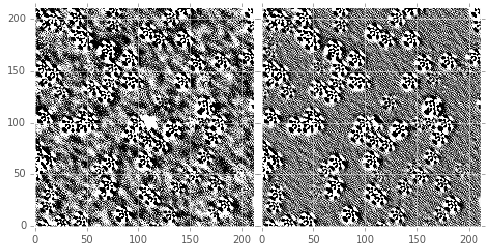

In [9]:
D /= D.std()
diffim1 /= diffim1.std()
diffim2 /= diffim2.std()
dit.plotImageGrid(((diffim1-D)[x1d:x2d,y1d:y2d], (diffim2-D)[x1d:x2d,y1d:y2d]), imScale=4., clim=(-0.1,0.1))

(-0.5, 0.5)

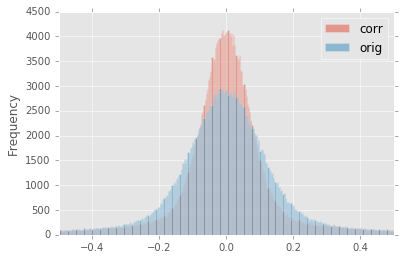

In [10]:
df = pd.DataFrame({'corr': (diffim2-D).flatten(), 'orig': (diffim1-D).flatten()})
df.plot.hist(alpha=0.5, bins=2000)
plt.xlim(-0.5, 0.5)

0.670191307374
0.259638454172
0.225623010002


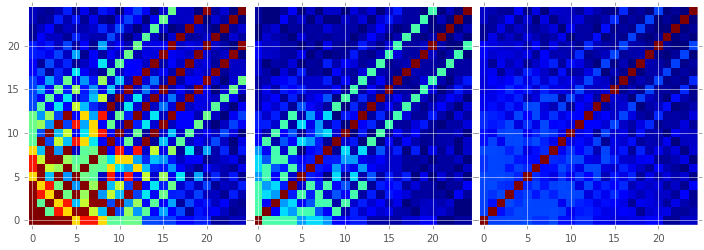

In [11]:
cov1 = dit.computePixelCovariance(diffim1)
cov2 = dit.computePixelCovariance(diffim2)
cov3 = dit.computePixelCovariance(D)
dit.plotImageGrid((cov1, cov2, cov3), imScale=4., clim=(0, 0.1), cmap=None)
#plt.colorbar()